In [30]:
import seaborn as sns
import pandas as pd
import sklearn.preprocessing as sklp
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('../IRIS/iris.csv')

# Visualizing

In [32]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [34]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [35]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [36]:
df = df.drop('Id', axis=1)

In [37]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [39]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


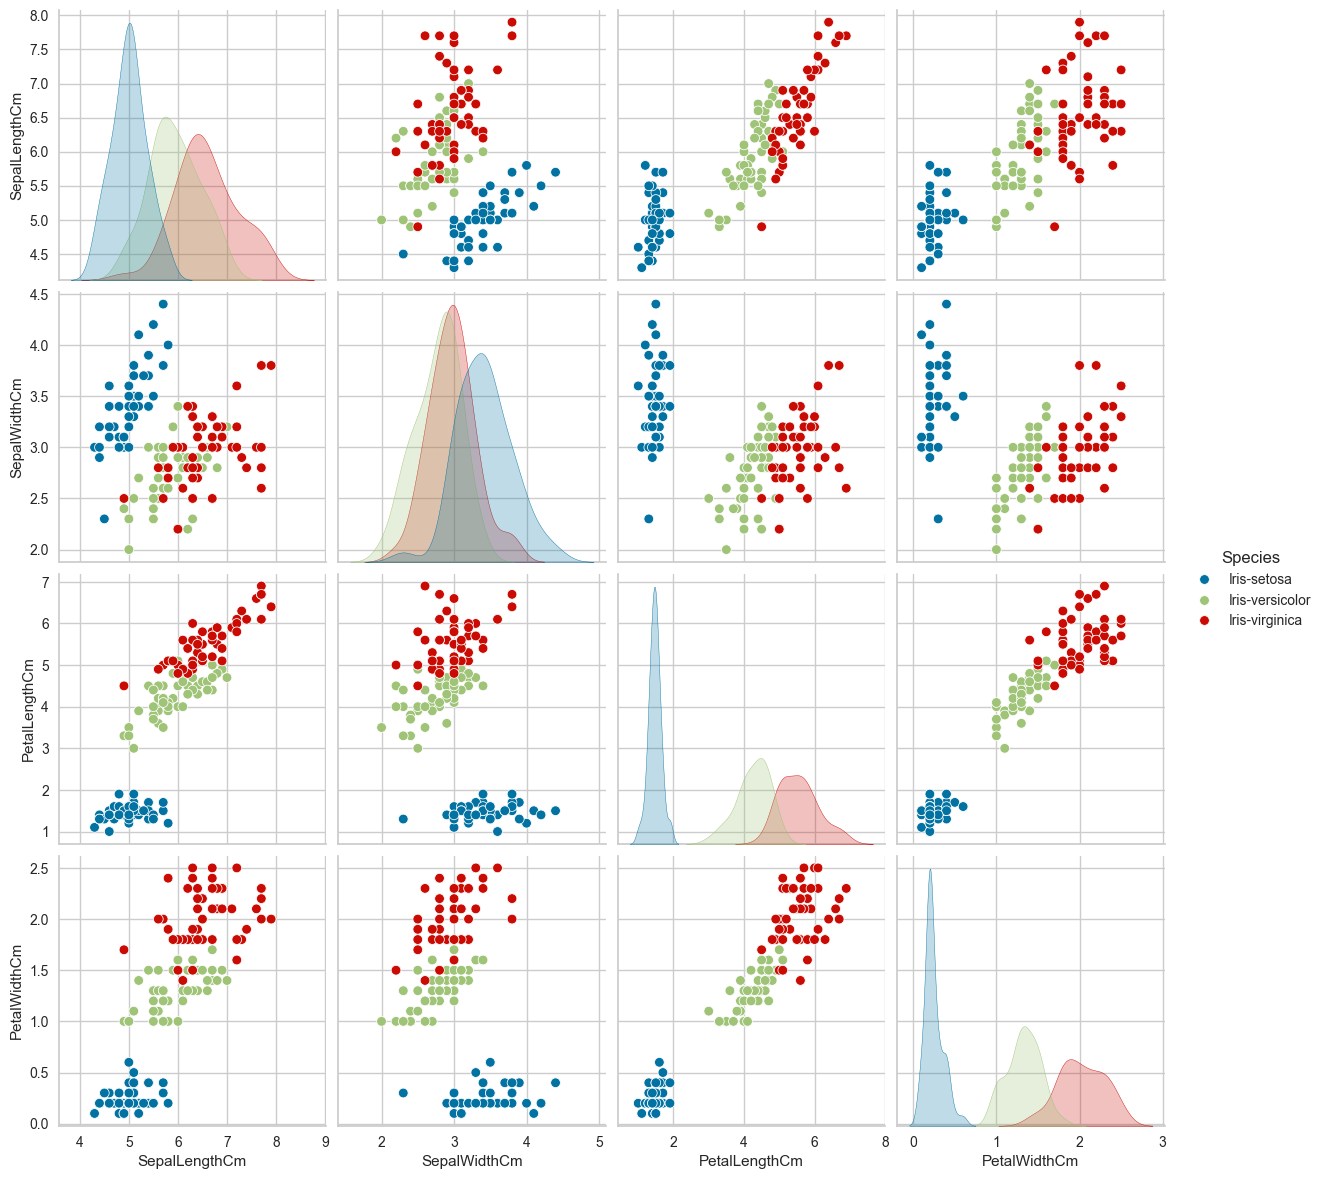

In [40]:
sns.pairplot(df, hue="Species", size=3)

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

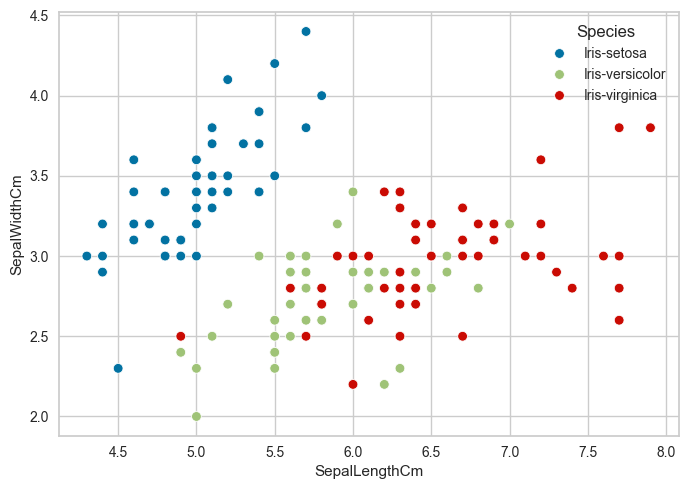

In [41]:
sns.scatterplot(x=df['SepalLengthCm'], y=df['SepalWidthCm'], hue=df.Species)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

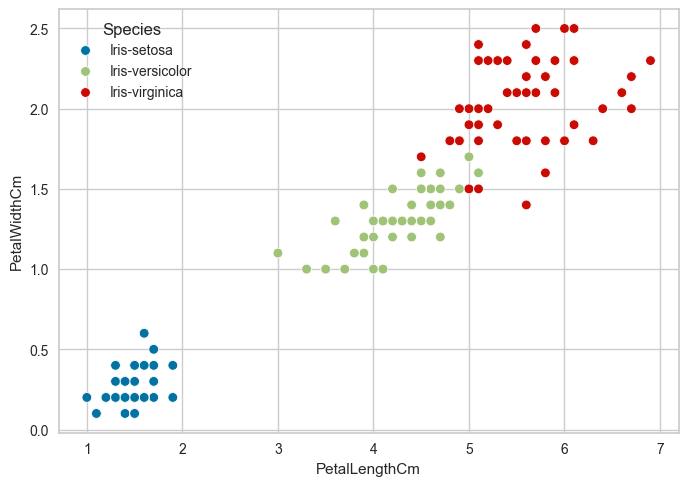

In [42]:
sns.scatterplot(x=df['PetalLengthCm'], y=df['PetalWidthCm'], hue=df.Species)

In [43]:
species = df['Species']
species.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [44]:
sscaler = StandardScaler()

df = df.drop('Species', axis=1)
df_s = sscaler.fit_transform(df)

In [45]:
df_s


array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

<Axes: >

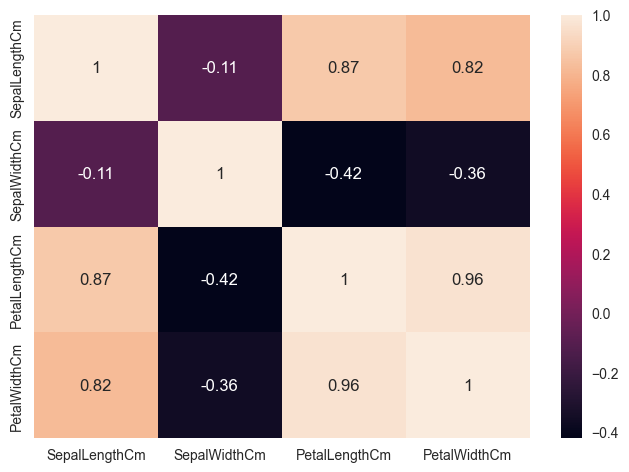

In [46]:
sns.heatmap(df.corr(), annot=True)

In [47]:
scaler = MinMaxScaler()
df_m = scaler.fit_transform(df)

df_m

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [48]:
petalLengthCm = df_m[:,2]
petalLengthCm

array([0.06779661, 0.06779661, 0.05084746, 0.08474576, 0.06779661,
       0.11864407, 0.06779661, 0.08474576, 0.06779661, 0.08474576,
       0.08474576, 0.10169492, 0.06779661, 0.01694915, 0.03389831,
       0.08474576, 0.05084746, 0.06779661, 0.11864407, 0.08474576,
       0.11864407, 0.08474576, 0.        , 0.11864407, 0.15254237,
       0.10169492, 0.10169492, 0.08474576, 0.06779661, 0.10169492,
       0.10169492, 0.08474576, 0.08474576, 0.06779661, 0.08474576,
       0.03389831, 0.05084746, 0.08474576, 0.05084746, 0.08474576,
       0.05084746, 0.05084746, 0.05084746, 0.10169492, 0.15254237,
       0.06779661, 0.10169492, 0.06779661, 0.08474576, 0.06779661,
       0.62711864, 0.59322034, 0.66101695, 0.50847458, 0.61016949,
       0.59322034, 0.62711864, 0.38983051, 0.61016949, 0.49152542,
       0.42372881, 0.54237288, 0.50847458, 0.62711864, 0.44067797,
       0.57627119, 0.59322034, 0.52542373, 0.59322034, 0.49152542,
       0.6440678 , 0.50847458, 0.66101695, 0.62711864, 0.55932

In [49]:
petalWidthCm = df_m[:,3]
petalWidthCm

array([0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
       0.125     , 0.08333333, 0.04166667, 0.04166667, 0.        ,
       0.04166667, 0.04166667, 0.        , 0.        , 0.04166667,
       0.125     , 0.125     , 0.08333333, 0.08333333, 0.08333333,
       0.04166667, 0.125     , 0.04166667, 0.16666667, 0.04166667,
       0.04166667, 0.125     , 0.04166667, 0.04166667, 0.04166667,
       0.04166667, 0.125     , 0.        , 0.04166667, 0.        ,
       0.04166667, 0.04166667, 0.        , 0.04166667, 0.04166667,
       0.08333333, 0.08333333, 0.04166667, 0.20833333, 0.125     ,
       0.08333333, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
       0.54166667, 0.58333333, 0.58333333, 0.5       , 0.58333333,
       0.5       , 0.625     , 0.375     , 0.5       , 0.54166667,
       0.375     , 0.58333333, 0.375     , 0.54166667, 0.5       ,
       0.54166667, 0.58333333, 0.375     , 0.58333333, 0.41666667,
       0.70833333, 0.5       , 0.58333333, 0.45833333, 0.5    

<Axes: >

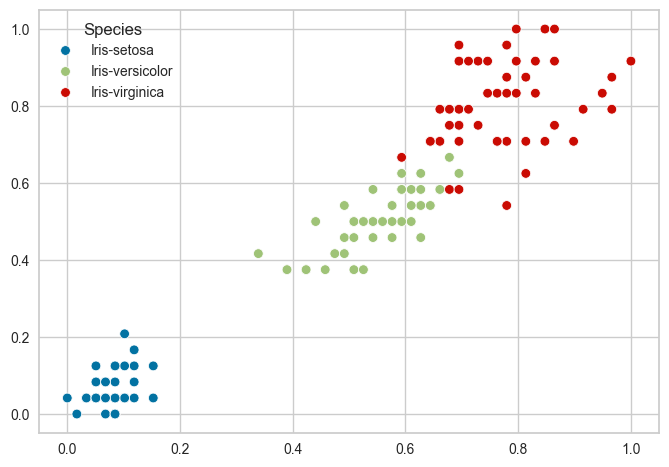

In [50]:
sns.scatterplot(x=petalLengthCm, y=petalWidthCm, hue=species)

# Elbow

In [51]:
n_cluster = range(1,10)
inertia = []

for k in n_cluster:
    km = KMeans(n_clusters = k)
    km.fit(df_m)
    inertia.append(km.inertia_)

In [52]:
inertia

[41.13817202297776,
 12.143688281579719,
 6.998114004826761,
 5.532831003081897,
 4.571923613060553,
 3.9297268423415024,
 3.46053748146043,
 3.1328647715058113,
 2.815184874414776]

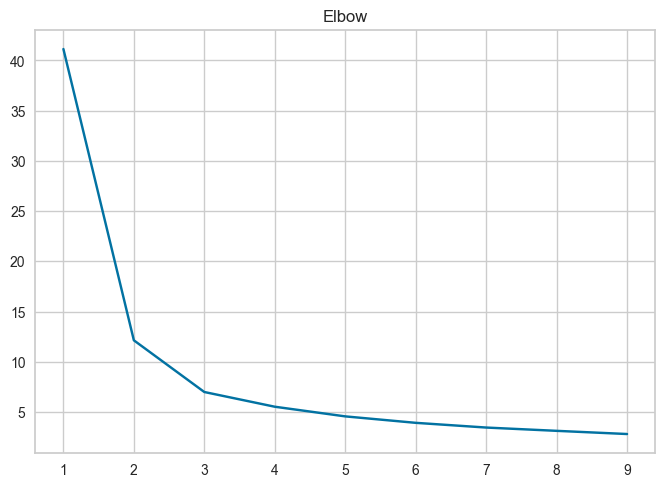

In [53]:
plt.title('Elbow')
plt.plot(n_cluster, inertia)
plt.show()

# Silhouett Score

In [54]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_m)
labels = kmeans.labels_

silhouette_avg = silhouette_score(df_m, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5043188549150884


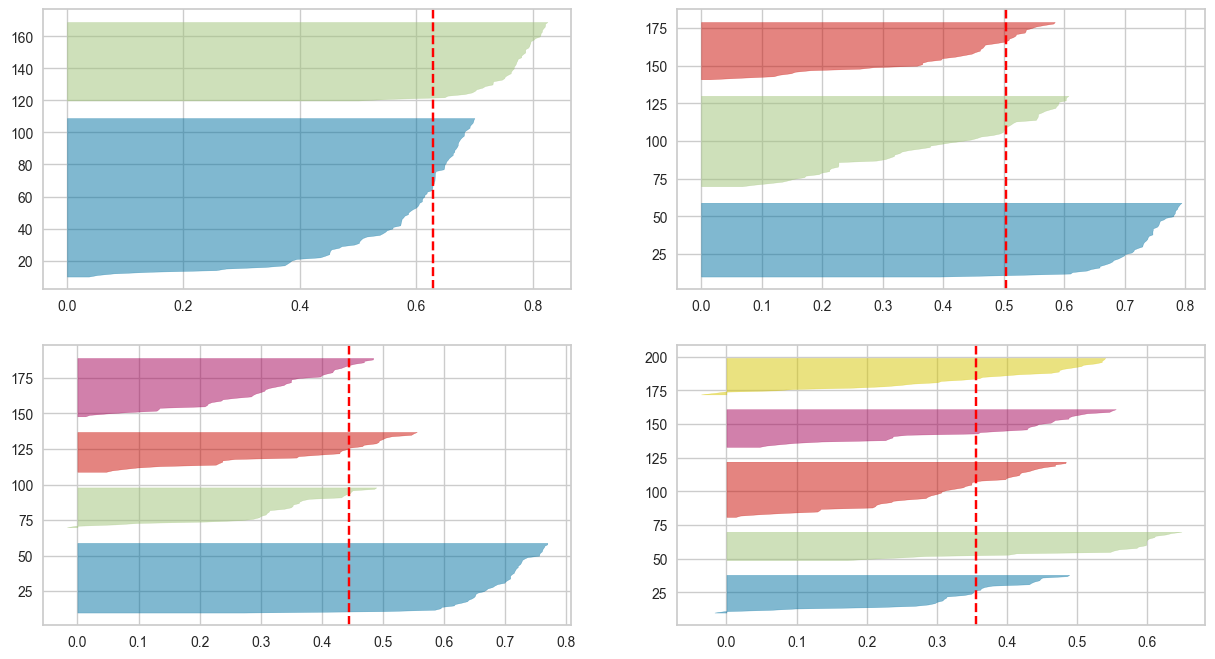

In [55]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_m)

# Hierarchical Cluster

In [56]:
n_clusters = 3
agglomerative_clustering = AgglomerativeClustering(linkage='ward', n_clusters=n_clusters)
labels = agglomerative_clustering.fit_predict(df_m)

In [57]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

# Dendrogram

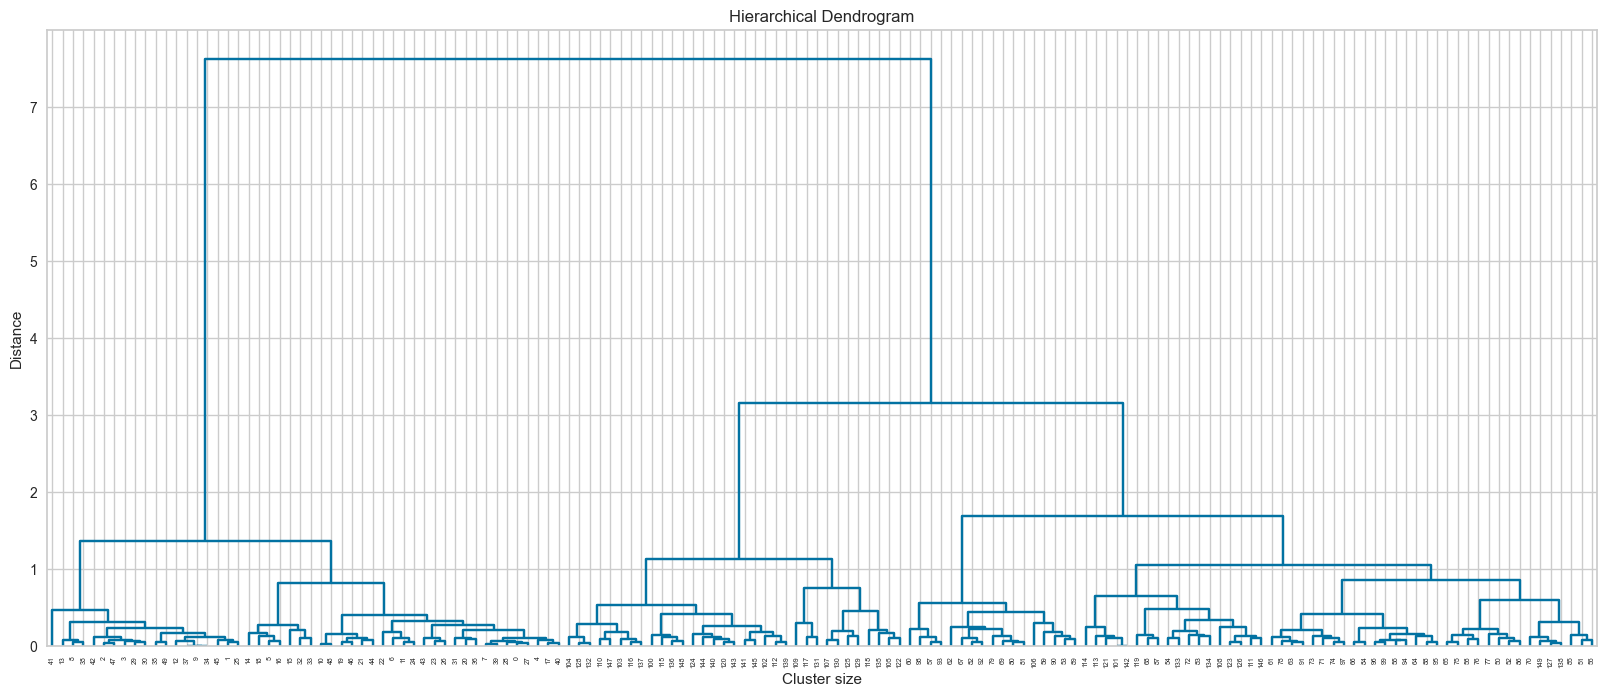

In [58]:
matrix = linkage(df_m, 'ward')
plot = plt.figure(figsize=(20,8)) # IF DOESN'T FIT IN YOUR DISPLAY, PLEASE CHANGE 20 TO A LOWER NUMBER
dendrogram(matrix, color_threshold=0)
plt.title('Hierarchical Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()